<a href="https://colab.research.google.com/github/Sharanteja-stack/Walmart-Sales-Customer-Behavior-Analysis/blob/main/Walmart_Sales_%26_Customer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load the dataset to ensure we're working with a fresh copy for this step
df = pd.read_csv('/content/walmart.csv')

print("--- Step 2: Data Cleaning & Preprocessing ---")

# Check for missing values (already confirmed none in initial inspection, but good practice)
print("Missing values before cleaning:")
print(df.isnull().sum())

# No missing values found, so no imputation needed.

# Convert 'Stay_In_Current_City_Years' to a more usable numerical format.
# '4+' can be treated as 4 or as a separate category if needed. For simplicity, let's map '4+' to 4.
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4').astype(int)
print("\n'Stay_In_Current_City_Years' converted to integer type.")

# 'Age' is an object type, let's explore its unique values
print(f"\nUnique Age categories: {df['Age'].unique()}")
# We can create a mapping for age ranges to numerical representation if we want to treat it as ordinal
# For now, we'll keep it as categorical for plots, but be aware of its order.

# Check for logical inconsistencies or outliers in 'Purchase' (though describe already gives min/max)
# For instance, very low or very high purchase amounts might be data entry errors.
# df[df['Purchase'] < 100] # Example: check very low purchases if they seem unusual

# Create aggregated features at the User_ID level for potential segmentation
user_df = df.groupby('User_ID').agg(
    Total_Purchase=('Purchase', 'sum'),
    Avg_Purchase_Per_Product=('Purchase', 'mean'),
    Num_Unique_Products_Purchased=('Product_ID', 'nunique'),
    Num_Transactions=('Product_ID', 'count'), # Number of distinct purchase line items
    Gender=('Gender', 'first'), # Assuming gender is constant per user
    Age=('Age', 'first'),
    Occupation=('Occupation', 'first'),
    City_Category=('City_Category', 'first'),
    Stay_In_Current_City_Years=('Stay_In_Current_City_Years', 'first'),
    Marital_Status=('Marital_Status', 'first')
).reset_index()

print("\nAggregated User-Level Data Head:")
print(user_df.head())
print(f"Number of unique users: {len(user_df)}")

--- Step 2: Data Cleaning & Preprocessing ---
Missing values before cleaning:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

'Stay_In_Current_City_Years' converted to integer type.

Unique Age categories: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Aggregated User-Level Data Head:
   User_ID  Total_Purchase  Avg_Purchase_Per_Product  \
0  1000001          334093               9545.514286   
1  1000002          810472              10525.610390   
2  1000003          341635              11780.517241   
3  1000004          206468              14747.714286   
4  1000005          821001               7745.292453   

   Num_Unique_Products_Purchased  Num_Transactions Gender    Age  Occupation  \
0 


--- Step 3: Exploratory Data Analysis (EDA) ---


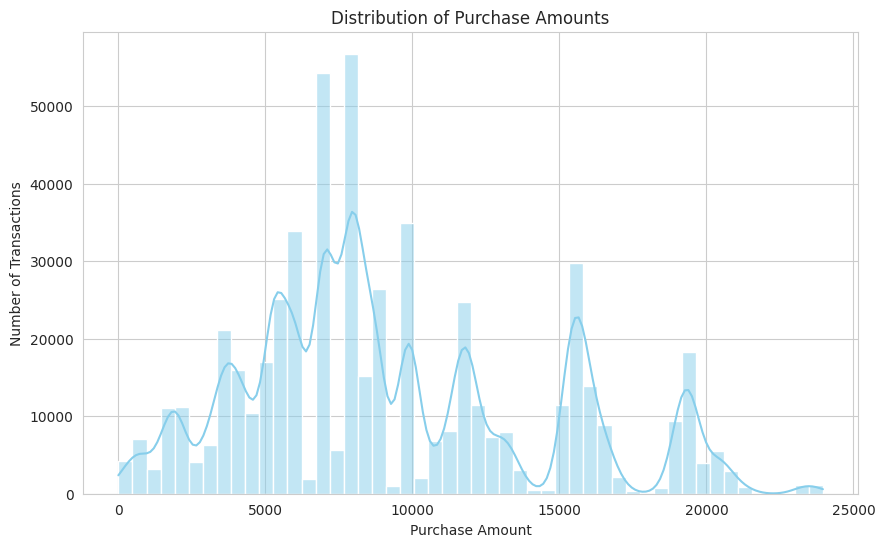

<ipython-input-6-e786f0023b46>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase', data=df, estimator=np.mean, palette='pastel')


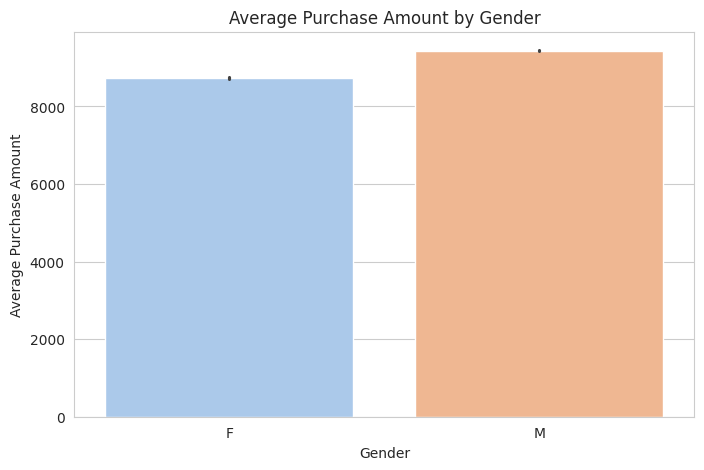

<ipython-input-6-e786f0023b46>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Purchase', data=df, estimator=np.mean, order=age_order, palette='viridis')


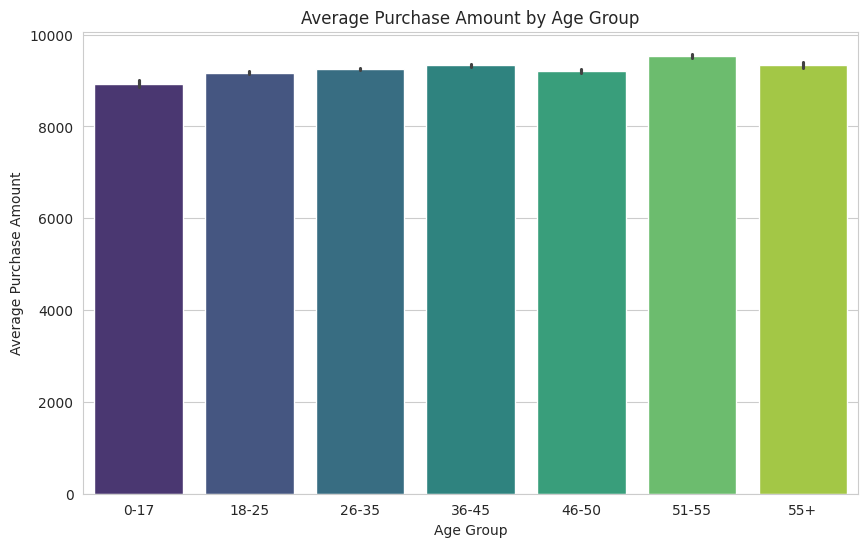

<ipython-input-6-e786f0023b46>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_purchase.index, y=occupation_purchase.values, palette='plasma')


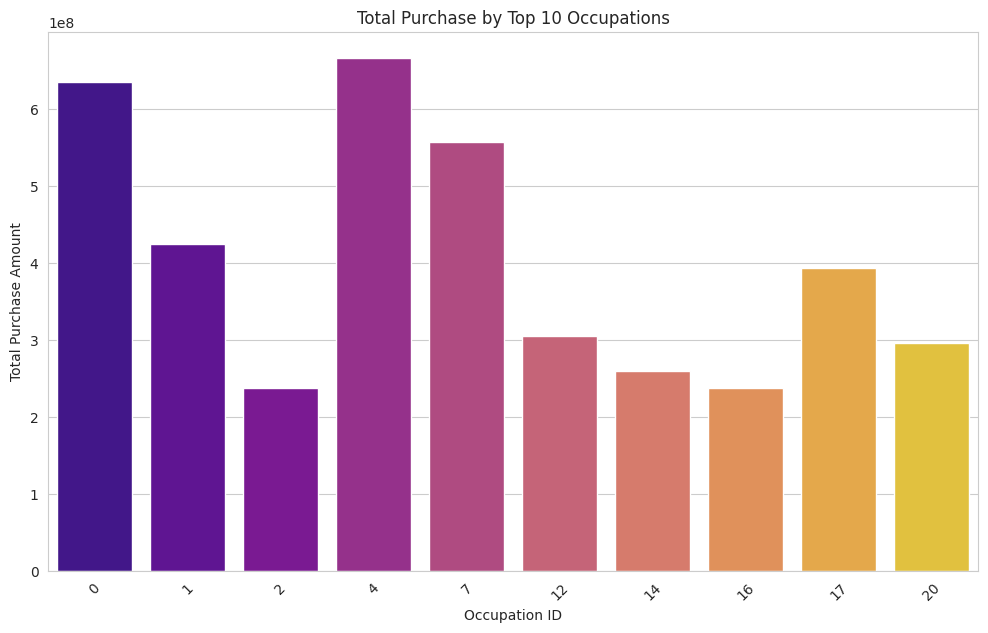

<ipython-input-6-e786f0023b46>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City_Category', y='Purchase', data=df, estimator=np.mean, palette='coolwarm')


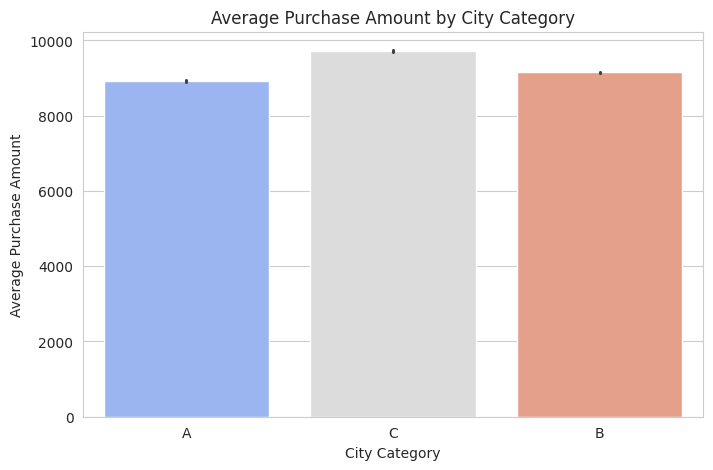

<ipython-input-6-e786f0023b46>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='Purchase', data=df, estimator=np.mean, palette='mako')


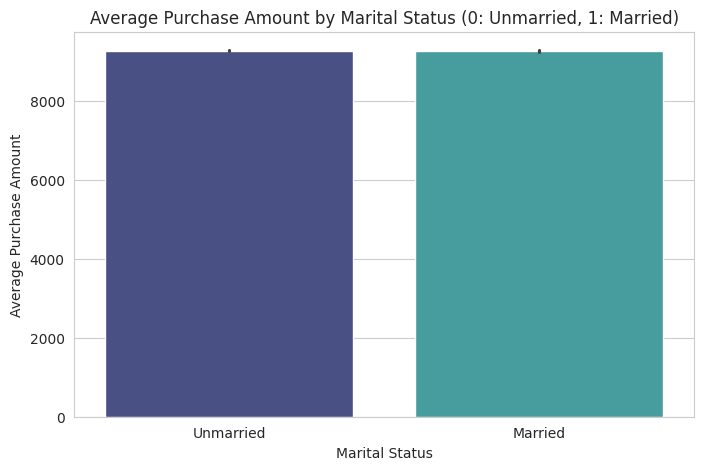

<ipython-input-6-e786f0023b46>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=df, estimator=np.mean, palette='crest')


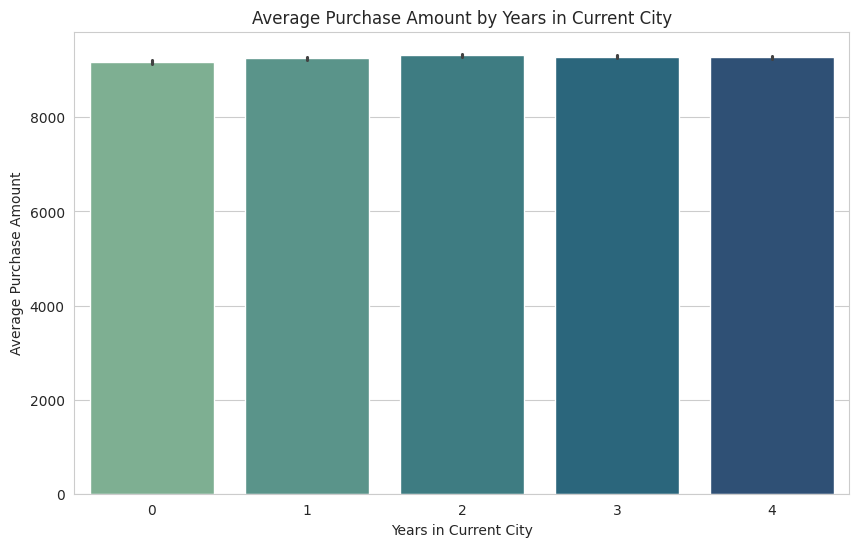

<ipython-input-6-e786f0023b46>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_purchase.index, y=product_category_purchase.values, palette='magma')


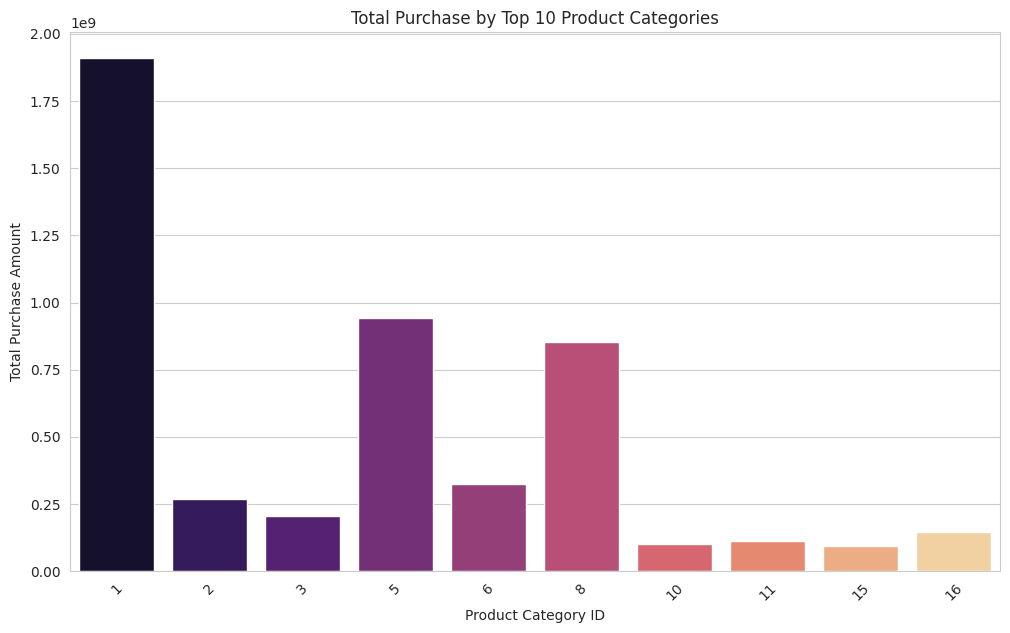

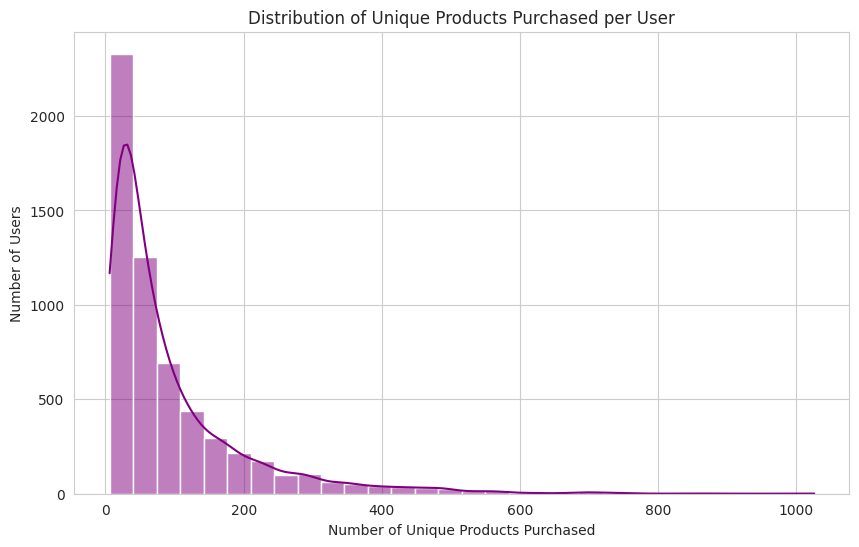

<ipython-input-6-e786f0023b46>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_by_count.index, y=top_products_by_count.values, palette='rocket')


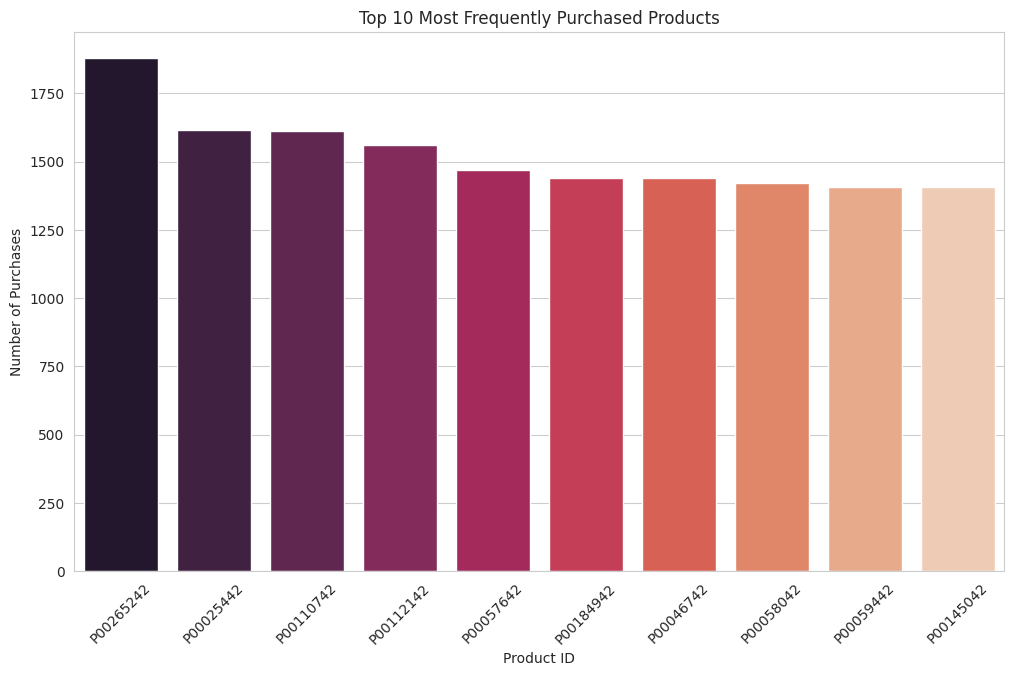


EDA plots generated. Please review them for insights.


In [6]:
# --- Step 3: Exploratory Data Analysis (EDA) ---
print("\n--- Step 3: Exploratory Data Analysis (EDA) ---")

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Adjust for higher resolution plots

# 3.1 Overall Purchase Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Number of Transactions')
plt.show()

# 3.2 Purchase by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Purchase', data=df, estimator=np.mean, palette='pastel')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

# 3.3 Purchase by Age Group
plt.figure(figsize=(10, 6))
# Ensure Age categories are ordered for plotting
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.barplot(x='Age', y='Purchase', data=df, estimator=np.mean, order=age_order, palette='viridis')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.show()

# 3.4 Purchase by Occupation (Top 10 Occupations by Total Purchase)
plt.figure(figsize=(12, 7))
occupation_purchase = df.groupby('Occupation')['Purchase'].sum().nlargest(10).sort_values(ascending=False)
sns.barplot(x=occupation_purchase.index, y=occupation_purchase.values, palette='plasma')
plt.title('Total Purchase by Top 10 Occupations')
plt.xlabel('Occupation ID')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

# 3.5 Purchase by City Category
plt.figure(figsize=(8, 5))
sns.barplot(x='City_Category', y='Purchase', data=df, estimator=np.mean, palette='coolwarm')
plt.title('Average Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.show()

# 3.6 Purchase by Marital Status
plt.figure(figsize=(8, 5))
sns.barplot(x='Marital_Status', y='Purchase', data=df, estimator=np.mean, palette='mako')
plt.title('Average Purchase Amount by Marital Status (0: Unmarried, 1: Married)')
plt.xlabel('Marital Status')
plt.ylabel('Average Purchase Amount')
plt.xticks([0, 1], ['Unmarried', 'Married'])
plt.show()

# 3.7 Purchase by Stay in Current City Years
plt.figure(figsize=(10, 6))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=df, estimator=np.mean, palette='crest')
plt.title('Average Purchase Amount by Years in Current City')
plt.xlabel('Years in Current City')
plt.ylabel('Average Purchase Amount')
plt.show()

# 3.8 Sales by Product Category (Top 10 by Total Purchase)
plt.figure(figsize=(12, 7))
product_category_purchase = df.groupby('Product_Category')['Purchase'].sum().nlargest(10).sort_values(ascending=False)
sns.barplot(x=product_category_purchase.index, y=product_category_purchase.values, palette='magma')
plt.title('Total Purchase by Top 10 Product Categories')
plt.xlabel('Product Category ID')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

# 3.9 Number of unique products purchased per user
plt.figure(figsize=(10, 6))
sns.histplot(user_df['Num_Unique_Products_Purchased'], bins=30, kde=True, color='purple')
plt.title('Distribution of Unique Products Purchased per User')
plt.xlabel('Number of Unique Products Purchased')
plt.ylabel('Number of Users')
plt.show()

# 3.10 Top 10 Most Purchased Products (by count of transactions)
plt.figure(figsize=(12, 7))
top_products_by_count = df['Product_ID'].value_counts().nlargest(10)
sns.barplot(x=top_products_by_count.index, y=top_products_by_count.values, palette='rocket')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

print("\nEDA plots generated. Please review them for insights.")